In [3]:
from keras.datasets import imdb
import numpy as np
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
#原始模型， 16 個單元
from keras import models
from keras import layers
original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))
original_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
#容量較低的模型版本， 4 個單
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))
smaller_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
#原始模型， 16 個單元
original_hist = original_model.fit(x_train, y_train,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(x_test, y_test))
#容量較低的模型版本， 4 個單元
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                        epochs=20,
                                        batch_size=512,
                                        validation_data=(x_test, y_test))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - acc: 0.7324 - loss: 0.5614 - val_acc: 0.8781 - val_loss: 0.3466
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.9033 - loss: 0.2892 - val_acc: 0.8880 - val_loss: 0.2888
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9224 - loss: 0.2196 - val_acc: 0.8900 - val_loss: 0.2780
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9381 - loss: 0.1826 - val_acc: 0.8835 - val_loss: 0.2928
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9445 - loss: 0.1616 - val_acc: 0.8840 - val_loss: 0.2975
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9572 - loss: 0.1334 - val_acc: 0.8802 - val_loss: 0.3097
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9585 - loss: 0.1263 - val_acc: 0.8778 - val_loss: 0.3259
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9647 - loss: 0.1083 - val_acc: 0.8752 - val_loss: 0.3447
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9689 - loss:

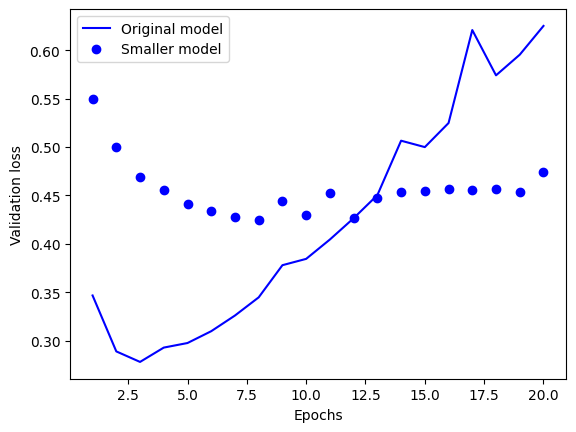

In [11]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']
import matplotlib.pyplot as plt
plt.plot(epochs, original_val_loss, 'b-',
         label='Original model')
plt.plot(epochs, smaller_model_val_loss, 'bo',
         label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()